________________

# Imports
________________

In [1]:
import torch
import torch.utils.data
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import torchvision
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

import argparse
import os
import random

import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from torch.utils.data import Subset
from torchvision.transforms import InterpolationMode
from torch.optim.lr_scheduler import StepLR

import sys, os
sys.path.append(os.path.abspath('..'))  # Ensure the parent directory of notebooks is in the system path

from modules.utils import plot_images, weights_init, augment_data, seed_all
from modules.DCGAN import Generator, Discriminator


/home/aditya/miniconda3/envs/QCNet/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/aditya/miniconda3/envs/QCNet/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


_____________

# READ DATA
_____________

### Read Folder Path and image Paths

In [2]:
chosen_class = 'bus'     # Choose Category 'boat' 'bus' or 'car' (here C)
desired_width = 64
desired_height = 64
folder_path = '../data/' 

class_names = os.listdir(folder_path)   # A list of images in folder path
print(f'Total classes in folder : {len(class_names)}')

Total classes in folder : 3


### Read All Images in the folder

In [3]:
# Decide which device we want to run on
device = torch.device("cuda:0" if torch.cuda.is_available()  else "cpu")

In [4]:
# Create the dataset
dataset = datasets.ImageFolder(root=folder_path,
                               transform=transforms.Compose([
                               transforms.Resize((desired_height,desired_width)),
                               transforms.ToTensor(),
                           ]))


# Filter data according to desired class
print(f'Class to id dictionary : {dataset.class_to_idx}')
chosen_class_id = dataset.class_to_idx[chosen_class]
print(f'Index of the desired class : {chosen_class_id} ')

class_indices = []
for i in range(len(dataset)):
    if dataset.imgs[i][1]==chosen_class_id:
        class_indices.append(i)
subset = Subset(dataset, class_indices)

all_data = []
for idx in range(len(subset)):
    data, target = subset[idx]
    all_data.append((data, target))

d_loader = DataLoader(subset, batch_size=len(subset))
for batch in d_loader:
    X_all, _ = batch  # data and target are torch tensors


Class to id dictionary : {'boat': 0, 'bus': 1, 'car': 2}
Index of the desired class : 1 


#################### SOME IMAGES FOR THE CATEGORY ####################


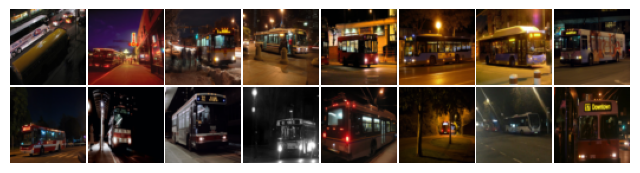

In [5]:
print("#################### SOME IMAGES FOR THE CATEGORY ####################")
plot_images(X_all[:16])

### 90-10 split the images

In [6]:
from sklearn.model_selection import train_test_split
D, V = train_test_split(X_all, test_size=0.1, random_state=42)
print(f"Images in the train set D : {D.shape[0]}")
print(f"Images in the test set V : {V.shape[0]}")

Images in the train set D : 97
Images in the test set V : 11


In [7]:
# Augment DATA for Training and Testing 
# Toggle 'plot=True' for viauslisation of augnemtations
X_train = augment_data(D, plot=False)
X_train = X_train[:576] 
X_val = augment_data(V, plot=False)
X_val_norm = 2 * X_val - 1
X_val_norm  = X_val_norm.to(device)

____________

# DC-GAN MODEL
_____________


In [8]:
seed_all(seed_val=42)

# Create the generator
netG = Generator().to(device)
# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)
# Print the model
#print(netG)

# Create the Discriminator
netD = Discriminator().to(device)
# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)
# Print the model
#print(netD)


# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()
# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
latent_dim = 100
fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device)
# Establish convention for real and fake labels during training
real_label = 1.0
fake_label = 0.0

# Learning rate for optimizers
lr = 0.0002
# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5
# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


# # Define the learning rate scheduler
# step_size = 50  
# gamma = 0.1  # Factor by which the learning rate is reduced
# schedulerG = StepLR(optimizerG, step_size=step_size, gamma=gamma)
# schedulerD = StepLR(optimizerD, step_size=step_size, gamma=gamma)



train_loader = DataLoader(X_train, batch_size=64, shuffle=True)
w_liss = []

patience = 105
max_epochs = 1000
patience_counter=0
previous_wasserstein_distance  = float('inf')



____________

# TRAINING MODEL
_____________

########## EPOCH : 0 : STILL TRAINING ##########


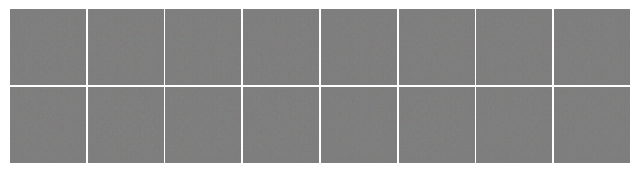

########## EPOCH : 25 : STILL TRAINING ##########


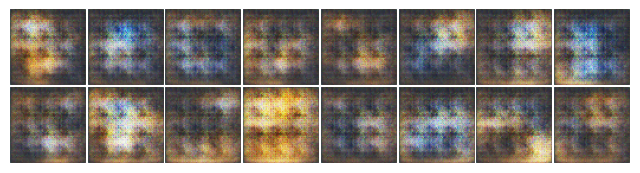

########## EPOCH : 50 : STILL TRAINING ##########


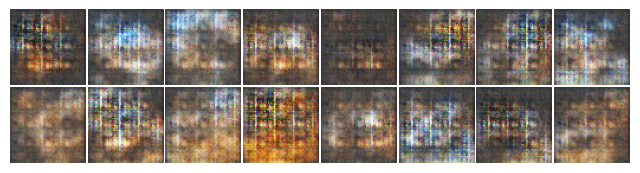

########## EPOCH : 75 : STILL TRAINING ##########


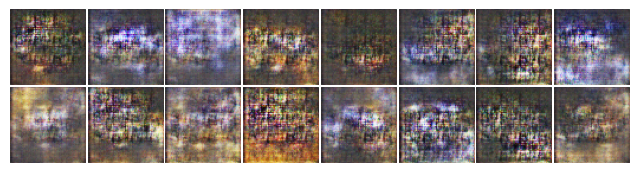

########## EPOCH : 100 : STILL TRAINING ##########


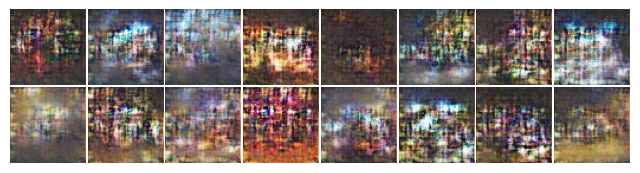

########## EPOCH : 125 : STILL TRAINING ##########


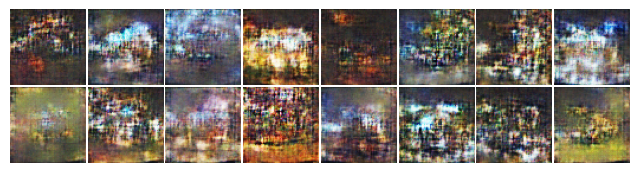

########## EPOCH : 150 : STILL TRAINING ##########


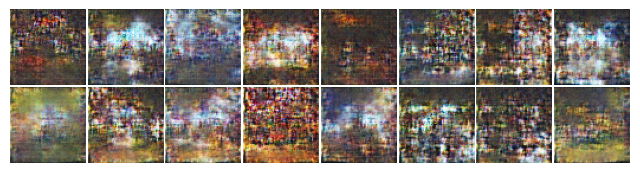

########## EPOCH : 175 : STILL TRAINING ##########


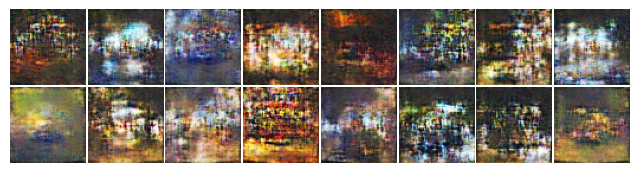

########## EPOCH : 200 : STILL TRAINING ##########


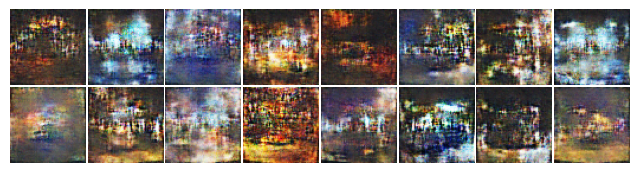

Early stopping after 201 epochs.
########## EPOCH : 200 ##########


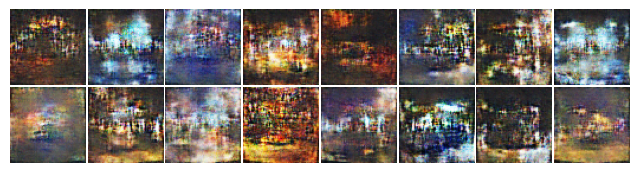

Early stopping after 201 epochs.






In [9]:
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
Total_losses = []
iters = 0
broken = False
for epoch in range(max_epochs):


    
    netG.train()
    netD.train()
    for batch_idx, X_batch in enumerate(train_loader):
        
        iters+=1
    
        X_norm = 2 * X_batch - 1
        X_norm = X_norm.to(device)
    
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        netD.zero_grad()
        b_size = X_norm.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(X_norm).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, latent_dim, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        
        # Update D
        optimizerD.step()


        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()


        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        Total_losses.append(G_losses[-1]+D_losses[-1])
        

        
    # After Every Epoch
    #schedulerG.step()
    #schedulerD.step()
    
    ##### USING VALIDATION SET FOR EARLY STOPPING #####

    netG.eval()
    netD.eval()
    

    with torch.no_grad():
        
        
        critic_real = netD(X_val_norm)     #.squeeze()
        fixed_test_noise = torch.randn(X_val_norm.shape[0], latent_dim, 1, 1, device=device)
        generated_test_samples = netG(fixed_test_noise)
        critic_fake = netD(generated_test_samples)     #.squeeze()
        current_wasserstein_distance = torch.mean(torch.abs(critic_fake - critic_real)).item()
        w_liss.append(current_wasserstein_distance )
        
        if epoch%25==0:
            with torch.no_grad():
                print(f'########## EPOCH : {epoch} : STILL TRAINING ##########')
                fake = netG(fixed_noise).detach().cpu()
                plot_images(((fake+1.0)/2.0)[:16])
            

        
    if current_wasserstein_distance < previous_wasserstein_distance:
        
        best_Gen_params = netG.state_dict()
        best_Dis_params = netG.state_dict()

        #patience_counter = 0
        

    else:
        patience_counter += 1
    
    previous_wasserstein_distance = current_wasserstein_distance

        
    if patience_counter >= patience:
        
        with torch.no_grad():
            print(f"Early stopping after {epoch+1} epochs.")
            print(f'########## EPOCH : {epoch} ##########')
            fake = netG(fixed_noise).detach().cpu()
            plot_images(((fake+1.0)/2.0)[:16])

        print(f"Early stopping after {epoch+1} epochs.")
        print("\n\n\n")


        break
    
    

____________

# HYPERPARAMETER TUNING
_____________


A following code of the form below 
```
    for LR in [1e-4, 2e-4, 3e-4, 5e-4, .001, .002, .004, .005,]:
        model.train()

```
was used to search for the best Learning Rate. It is not shown here as the images requires a lot of space. Learning Rate : 0.0002 works best<br><br>

Batch size were also experimented with  <code> batch_size=64</code> was found to be optimal
        

____________

# HEURISTIC ANALYSIS
_____________


Below are the use heuristics from the paper :  https://arxiv.org/pdf/1511.06434.pdf <br>
Following is a snipped of the heuristics suggested

1. BatchNorm was use as suggsted <br><br>
2. ReLU was used in generator as suggested <br><br>
3. LeakyReLU was used in discriminator as suggested <br><br>
4. Strided Convolutions were also used<br><br>
5. Please verify the claims presented here in the code of  <code>class Generator()</code> and <code>class Discriminator()</code> above <br><br>
6. A <code>Tanh()</code> layer was kept at the end of the generator so that images generated in [-1,-1] However to plot them they ere rescaled to [0,1]<br><br>
7. ReLU and LeakyRelu helped in faster Convergence as their gradients did not vanish.<br><br>
8. BatchNorm was useful as before that the images were distorted, It is so because the input is in range [-1,1]. There for at every layer the activations should be normalised<br><br>
9. The paper also suggests "All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02". This was adopted in <code>netD.apply(weights_init)</code>, <code>netG.apply(weights_init)</code> above. This provided better convergence then random initialization<br><br>
10. LR Scheduling was also tried but no significant results were improve for fine tutning. It might need more experimentation. The part of the code is commented out <br><br>
11. The training was done on the augmented dataset that had rotated(+5,-5) and flipped images. This helped increase the dataset size <br><br>


__________________________

# VISUAL ANALYSIS OF RESULTS
__________________________

Text(0.5, 1.0, 'Total Loss vs Iterations')

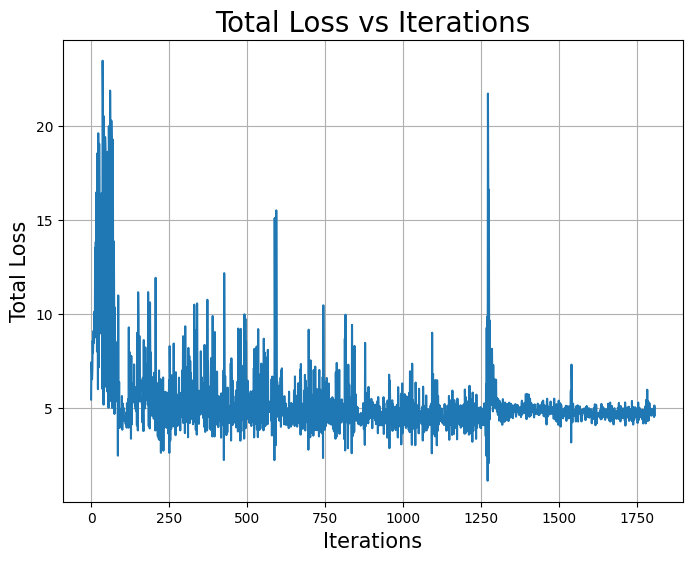

In [10]:
plt.figure(figsize=(8, 6))  # Width=8 inches, Height=6 inches
plt.plot(Total_losses)
plt.grid()
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Total Loss', fontsize=15)
plt.title('Total Loss vs Iterations', fontsize=20)

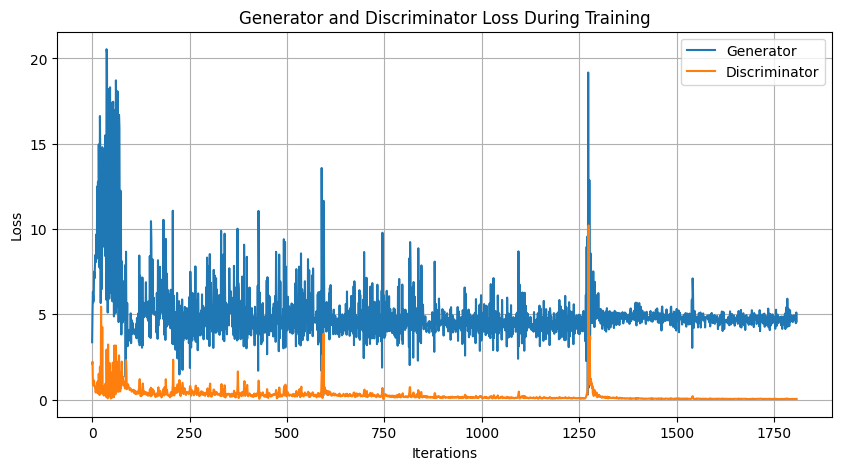

In [11]:
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="Generator")
plt.plot(D_losses,label="Discriminator")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

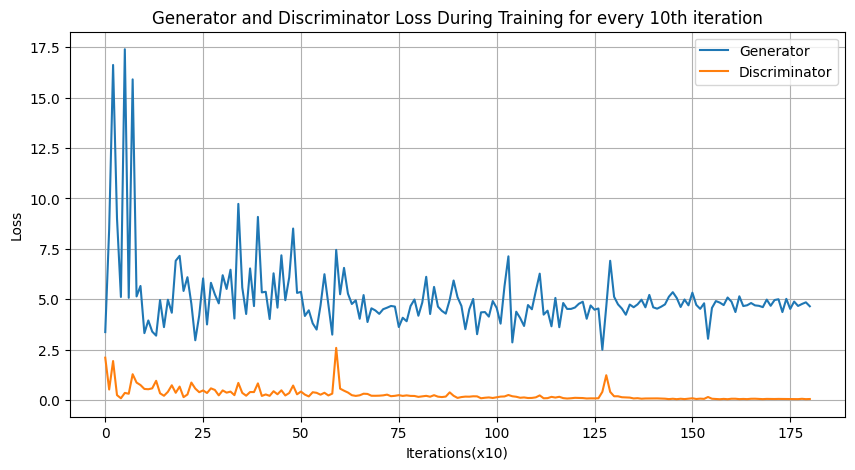

In [12]:
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Generator and Discriminator Loss During Training for every 10th iteration")
plt.plot(G_losses[::10],label="Generator")
plt.plot(D_losses[::10],label="Discriminator")
plt.xlabel("Iterations(x10)")
plt.ylabel("Loss")
plt.legend()
plt.show()

___________________

# IMAGE GENERATION
______

In [13]:
fixed_noise = torch.randn(96, latent_dim, 1, 1, device=device)
fake = netG(fixed_noise).detach().cpu()
X_10 = fake[:10]

In [14]:
X_10 = fake[:10]
X_10 = X_10.detach().cpu()

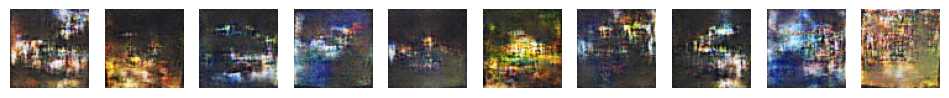

In [15]:
fig, axes = plt.subplots(1, 10, figsize=(12,8))  # Adjust the figsize as needed
for i in range(10):
    image = ((X_10[i]+1.0)/2.0).permute(1, 2, 0).numpy()
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

In [16]:
#### FILTER TOP 5 ########
top5 = []
for img in X_10:
    mse_score_liss = []
    for d_img in D:
        mse_score = F.mse_loss(img, d_img)
        mse_score_liss.append(mse_score.item())

    top_5_indices = sorted(range(len(mse_score_liss)), key=lambda i: mse_score_liss[i], reverse=True)[:5]
    top5.append(top_5_indices)

In [17]:
#### GENERATE ALL IMAGES ########
all_images = []
for idx in range(len(X_10)):
    all_images.append(X_10[idx])
    for d_img in D[top5[idx]]:
        all_images.append(d_img)
        
all_images = torch.stack(all_images)

________________
# CLOSEST IMAGE ANLYSIS
________________

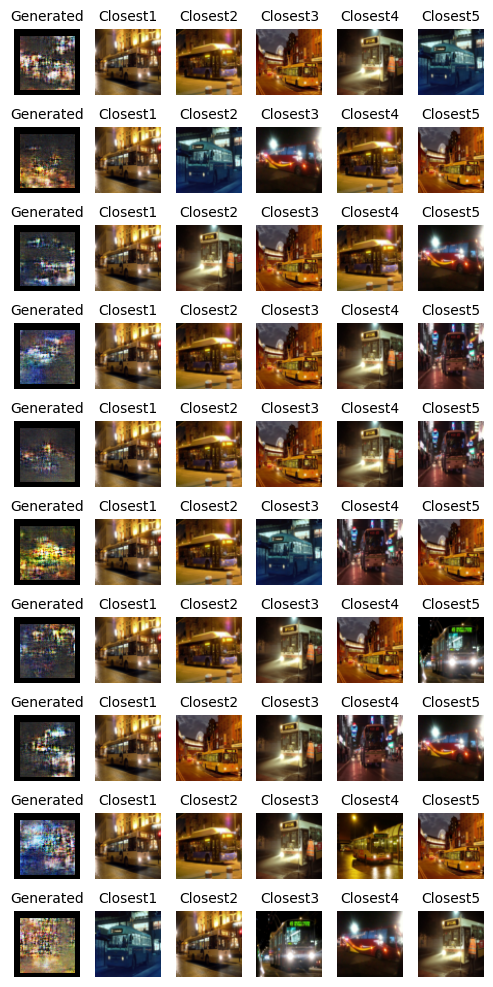

In [18]:
# Sample PyTorch tensor with 60 images shaped 60x3x64x64
images = all_images

# Create a figure and axis for plotting
fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(5, 10))

for i in range(10):
    for j in range(6):
        ax = axes[i, j]
        idx = i * 6 + j
        image = images[idx].permute(1, 2, 0).numpy()

        if j == 0:
            # For the first image in each row, add a thick black outline
            ax.imshow((image+1.0)/2.0)
            rect = plt.Rectangle((0, 0), 64, 64, linewidth=8, edgecolor='black', facecolor='none')
            ax.add_patch(rect)
        else:
            ax.imshow(image)
        if j==0:
            ax.set_title(f'Generated', fontsize=10)
        else:
            
            ax.set_title(f'Closest{j%6}', fontsize=10)
        ax.axis('off')

plt.tight_layout()
plt.show()

_________________________
# SOME GOOD RESULTS
_________________________


Below are the generated images for the trained GAN, please not that these were obtained after a lot of trial and erro. Although not very sharphly but some of them do resemble BUS class

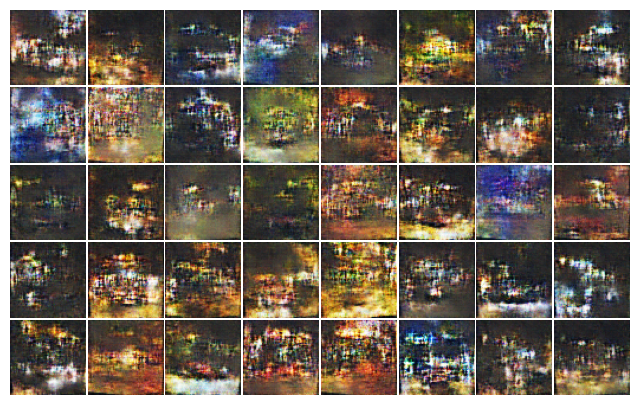

In [19]:
plot_images(((fake+1.0)/2.0)[:40])

_____
# ###############THANK YOU###############
_____